In [1]:
cd ../

/wk171/ytkuo/TCRI_reanalysis


In [2]:
%env CUDA_VISIBLE_DEVICES=-1

env: CUDA_VISIBLE_DEVICES=-1


In [3]:
import tensorflow as tf
tf.config.optimizer.set_jit(True)
from modules.data_handler import ascii_array_to_string
import pandas as pd
import numpy as np
from tqdm import tqdm

2023-04-12 13:50:02.208932: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [12]:
# fet experiment settings from yaml file
from modules.experiment_helper import parse_experiment_settings

experiment_path = 'experiments/cnn.yml'
experiment_settings = parse_experiment_settings(experiment_path)

In [13]:
# load dataset
from modules.data_handler import get_tensorflow_datasets

datasets = get_tensorflow_datasets(**experiment_settings['data'])

In [14]:
# load trained model
from modules.model_constructor import create_model_by_experiment_path

model = create_model_by_experiment_path(experiment_path, version='best-MSE')

saved_models/cnn/best-MSE


In [15]:
df = pd.DataFrame(columns=['now','24h_Vmax', 'pred_24h_Vmax', 'starting_frame'])
for image_sequences, labels, feature,frame_ID_ascii, dV in tqdm(datasets['test']):
    starting_frame = list(map(ascii_array_to_string, frame_ID_ascii.numpy()))
    pred = np.squeeze(model(image_sequences, feature).numpy())
    V24 = labels.numpy()
    now = V24 - dV.numpy()
    batch_size = pred.shape[0]
    for i in range(batch_size):
        df.loc[df.shape[0]] = [now[i], V24[i], pred[i], starting_frame[i]]

194it [00:28,  6.71it/s]


In [16]:
df = df.sort_values(['starting_frame']).reset_index(drop=True).round(2)

In [17]:
df.head(40)

,now,24h_Vmax,pred_24h_Vmax,starting_frame
0,13.12,28.24,39.45,201901E_2019062515
1,13.12,30.55,32.25,201901E_2019062518
2,16.12,33.51,41.63,201901E_2019062521
3,18.12,35.24,38.96,201901E_2019062600
4,18.30,37.86,49.85,201901E_2019062603
5,18.68,39.13,42.92,201901E_2019062606
6,22.16,38.69,50.42,201901E_2019062609
7,24.64,38.32,49.06,201901E_2019062612
8,28.24,40.79,62.44,201901E_2019062615
9,30.55,42.33,55.79,201901E_2019062618


In [18]:
(abs(df.pred_24h_Vmax- df['24h_Vmax'])).mean()

11.391695912469034

In [12]:
(abs(df.pred_24h_Vmax- df.now)).mean()

14.418202931461604

In [19]:
df.to_csv('./saved_csv/cnn.csv', index = False)

In [6]:
import matplotlib.pyplot as plt

In [64]:
for image_sequences, labels, feature,frame_ID_ascii, dV in datasets['test']:
    break

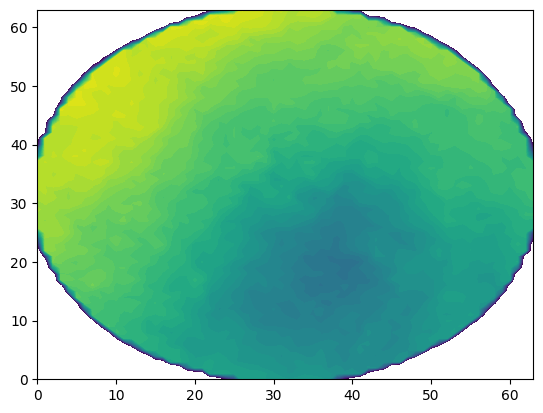

In [65]:
tmp = image_sequences[:,0,:,:,0]
tmp = np.nanmean(tmp, axis = 0)
plt.contourf(tmp, levels=np.linspace(200,280))